# Linear Regression - Least Squares  

-------------  

_Author: Khal Makhoul, W.P.G.Peterson_  

## Project Guide
----------------  
- [Project Overview](#overview)
- [Introduction and Review](#intro)
- [Data Exploration](#data)  
- [Coding Linear Regression](#code)

<a id = "overview"></a>
## Project Overview
----------
#### EXPECTED TIME 2 HRS

This assignment will test your ability to code your own version of least squares regression in `Python`. After a brief review of some of the content from the lecture you will be asked to create a number of functions that will eventually be able to read in raw data to `Pandas` and perform a least squares regression on a subset of that data.  

This will include:  
- Calculating least squares weights
- reading data on dist to return `Pandas` DataFrame  
- select data by column  
- implement column cutoffs  

** Motivation**: Least squares regression offer a way to build a closed-form and interpretable model.  

**Objectives**: This assignment will:
- Test `Python` and `Pandas` competency
- Ensure understanding of the mathematical foundations behind least squares regression  

**Problem**: Using housing data, we will attempt to predict house price using living area with a regression model.  

**Data**: Our data today comes from [Kaggle's House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).  

See above link for Description of data from `Kaggle`.  

<a id = "intro"></a>
### Introduction and Review

As long as a few basic assumptions are fulfilled, linear regression using least squares is solvable exactly, without requiring approximation. 

This means that the equations presented in the week 1 lectures can be adapted directly to `Python` code, making this good practice both for using `Python` and translating an "algorithm" to code.

We will use the matrix version of the least squares solution presented in lecture to derive the desired result. As a reminder, this expresses the least squares coefficients $w_{LS}$ as a vector, and calculates that vector as a function of $X$, the matrix of inputs, and $y$, the vector of outputs from the training set:

$$w_{LS} = (X^T X)^{−1}X^T y,$$

where $w_{LS}$ refers to the vector of weights we are trying to find, $X$ is the matrix of inputs, and $y$ is the output vector. 

In this equation, $X$ is always defined to have a vector of $1$ values as its first column. In other words, even when there is only one input value for each data point, $X$ takes the form:

$$
X = \begin{bmatrix}
1 \  x_{11}  \\
1 \  x_{21}  \\
\vdots \ \vdots \\
1 \ x_{n1}
\end{bmatrix} 
$$

For two inputs per data point, $X$ will take this form:
 
$$
X = \begin{bmatrix}
1 \  x_{11} \  x_{12} \\
1 \  x_{21} \  x_{22} \\
\vdots \ \vdots \\
1 \ x_{n1} \  x_{n2}
\end{bmatrix} 
$$




Please refer to lecture notes for additional context.  
<a id = "data"></a>
### Data Exploration

Before coding an algorithm, we will take a look at our data using `Python`'s `pandas`. For visualizations we'll use `matplotlib`. Familiarity with these modules will serve you well. The following cells include comments to explain the purpose of each step.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = (20.0, 10.0)
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'Applied_Machine_Learning_Week1.ipynb',
 'solution',
 'test.csv',
 'train.csv']

In [2]:
for file in os.listdir():
    if 'test' in file:
        test = pd.read_csv(file)
        print(file)
    if 'train' in file:
        train = pd.read_csv(file)
        print(file)
print('The length of train is {}, and the length of test is {}'.format(len(train),len(test)))

test.csv
train.csv
The length of train is 1460, and the length of test is 1459


In [3]:
data = []
for file in os.listdir():
    if file.endswith('csv'):
        data.append(pd.DataFrame(pd.read_csv(file)))
test, train = data[0], data[1]
print('The length of train is {}, and the length of test is {}'.format(len(train),len(test)))

The length of train is 1460, and the length of test is 1459


In [4]:
data = [pd.DataFrame(pd.read_csv(file)) for file in os.listdir() if file.endswith('csv')]
test, train = data[0], data[1]
print('The length of train is {}, and the length of test is {}'.format(len(train),len(test)))

The length of train is 1460, and the length of test is 1459


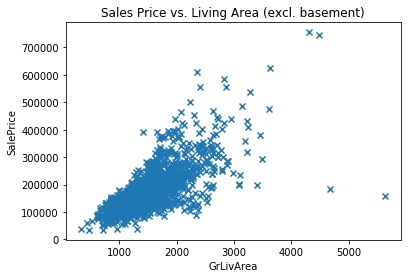

In [5]:
### We can plot the data as follows
### Price v. living area
### with matplotlib

Y = train['SalePrice']
X = train['GrLivArea']

plt.scatter(X, Y, marker = "x")

### Annotations
plt.title("Sales Price vs. Living Area (excl. basement)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice");

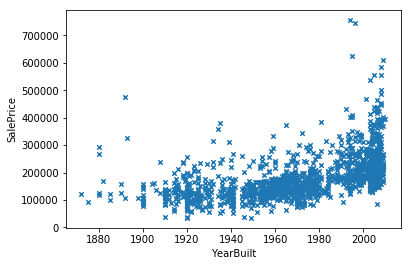

In [6]:
### price v. year
### Using Pandas

train.plot('YearBuilt', 'SalePrice', kind = 'scatter', marker = 'x');

# Coding Linear Regression

### Invert the matrix of Training Data

In [7]:
def invert(mat):
    return np.linalg.inv(mat)

#Construct a matrix of random numbers
x = []
for i in range(5):
    x.append([np.random.randn() for i in range(5)])
x = np.array(x)
#test the function
print('From the Data {}'.format(x))
print('The Inverse is {}'.format(invert(x)))

From the Data [[ 0.71805779 -0.71157347 -0.37474287 -0.11359564  1.38457663]
 [ 1.6710053   0.34872662  0.97376657 -1.21939167  1.89553794]
 [-0.44945654 -3.10321346 -0.11214211 -1.94404702 -0.3847498 ]
 [-0.12943851  0.84772123 -0.35449149  0.20010273  1.34284471]
 [ 2.24100439  0.01970994 -0.38490525  0.08140752 -1.90526635]]
The Inverse is [[ 0.29792825  0.12331851 -0.10475367 -0.18939142  0.22686597]
 [-0.65180459  0.11303754  0.05560362  0.78534642  0.18107618]
 [ 0.16039959  0.34186147 -0.38966428 -1.42157061 -0.46656385]
 [ 0.89316108 -0.24189323 -0.54316765 -1.13261126 -0.28017355]
 [ 0.34944346  0.06681958 -0.06712531  0.0241536  -0.17385953]]


In [8]:
def select_columns(data_frame, column_names):   
    df = data_frame[column_names]
    return df
dat = select_columns(train, list(train.columns[0:9]) )

# Different ways to subset Data

In [9]:
def column_cutoff(data_frame, cutoffs):

    names, max_, min_ = [] , [] , []
    for cut in cutoffs:
        names.append(cut[0])
        min_.append(cut[1])
        max_.append(cut[2])
        
    data_frame = data_frame[((data_frame[names[0]]<=max_[0]) & (data_frame[names[0]]>=min_[0]))
                           &((data_frame[names[1]]<=max_[1]) & (data_frame[names[0]]>=min_[1]))]
    
    

    return data_frame

In [10]:
def column_cutoff_1(dataframe,cutoffs):
    
    data_subset = dataframe
    
    for column_limits in cutoffs:
        data_subset = data_subset.loc[data_subset[column_limits[0]]>= column_limits[1],:]
        data_subset = data_subset.loc[data_subset[column_limits[0]]<= column_limits[2],:]
        
    return data_subset

In [11]:
def column_cutoff_2(dataframe,cutoffs):
    if len(cutoffs) == 0:
        return dataframe
    
    data_subset = dataframe
    data_subset = data_subset[(data_subset[cutoffs[0][0]]>=cutoffs[0][1])&
                             (data_subset[cutoffs[0][0]]<=cutoffs[0][2])]
    return column_cutoff_2(dataframe,cutoffs[:-2])

# Least Squares Estimation

In [21]:
def least_squares_weights(input_x, target_y):
    
    if input_x.shape[1]>input_x.shape[0]:
        
        input_x = input_x.T
        
    if target_y.shape[1]>target_y.shape[0]:
        
        target_y = target_y.T

    
    y = np.array(target_y).reshape((len(np.array(target_y)), 1))
    print('dimension of y is {}'.format(y.shape))
    x = np.hstack((np.ones((len(np.array(input_x)),1),dtype = np.float64), np.array(input_x)))
    print('dimension of x is {}'.format(x.shape))
    #np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y))
    least_squares = np.linalg.solve(np.dot(x.T,x), np.dot(x.T,y))

    return least_squares

In [22]:
df = train
df_sub = select_columns(df, ['SalePrice', 'GrLivArea', 'YearBuilt'])

cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
df_sub_cutoff = column_cutoff(df_sub, cutoffs)

X = df_sub_cutoff['GrLivArea'].values
Y = df_sub_cutoff['SalePrice'].values

### reshaping for input into function
training_y = np.array([Y])
training_x = np.array([X])

weights = least_squares_weights(training_x, training_y)
print(weights)
weights.shape

dimension of y is (1451, 1)
dimension of x is (1451, 2)
[[13454.06670576]
 [  110.78992341]]


(2, 1)

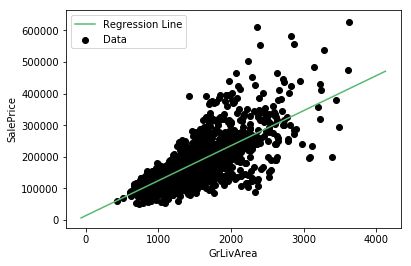

In [15]:
max_X = np.max(X) + 500
min_X = np.min(X) - 500

### Choose points evenly spaced between min_x in max_x
reg_x = np.linspace(min_X, max_X, 1000)

### Use the equation for our line to calculate y values
reg_y = weights[0][0] + weights[1][0] * reg_x

plt.plot(reg_x, reg_y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='k', label='Data')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

# RMSE

In [16]:
rmse = 0

b0 = weights[0][0]
b1 = weights[1][0]

for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(Y))
print(rmse)

53092.484869486616


# R^2

In [17]:
ss_t = 0
ss_r = 0

mean_y = np.mean(Y)

for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

0.5163484562864966


In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

### sklearn requires a 2-dimensional X and 1 dimensional y. The below yeilds shapes of:
### skl_X = (n,1); skl_Y = (n,)
skl_X = df_sub_cutoff[['GrLivArea']]
skl_Y = df_sub_cutoff['SalePrice']

lr.fit(skl_X,skl_Y)
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

Intercept: 13454.066705758683
Coefficient: [110.78992341]
